In [54]:
import numpy
import  pandas as pd
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import json
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pickle

In [55]:
dataframe = pd.read_csv('../data/timeEntry.csv',usecols=[1], engine='python', skipfooter=3)

dataset = dataframe.values

# 将整型变为float
dataset = dataset.astype('float32')
# print(dataset)
#归一化 在下一步会讲解
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# 保存标化器
pickle.dump(scaler, open(os.path.join("DATA","scaler.pkl"),'wb'))

train_size = int(len(dataset) * 0.65)
trainlist = dataset[:train_size]
testlist = dataset[train_size:]

In [38]:
def create_dataset(dataset, look_back):
#这里的look_back与timestep相同
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return numpy.array(dataX),numpy.array(dataY)
#训练数据太少 look_back并不能过大
look_back = 2
trainX,trainY  = create_dataset(trainlist,look_back)
testX,testY = create_dataset(testlist,look_back)
# trainX

In [39]:
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1] ,1 ))
print(trainX)
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(None,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
model.save(os.path.join("DATA","Test" + ".h5"))

[[[0.00510204]
  [0.        ]]

 [[0.        ]
  [0.00170068]]

 [[0.00170068]
  [0.00510204]]

 [[0.00510204]
  [0.00170068]]

 [[0.00170068]
  [0.        ]]

 [[0.        ]
  [0.00340136]]

 [[0.00340136]
  [0.00170068]]

 [[0.00170068]
  [0.00170068]]

 [[0.00170068]
  [0.00680272]]

 [[0.00680272]
  [0.00510204]]

 [[0.00510204]
  [0.0085034 ]]

 [[0.0085034 ]
  [0.00170068]]

 [[0.00170068]
  [0.0085034 ]]

 [[0.0085034 ]
  [0.00680272]]

 [[0.00680272]
  [0.02210884]]

 [[0.02210884]
  [0.01020408]]

 [[0.01020408]
  [0.00510204]]

 [[0.00510204]
  [0.01190476]]

 [[0.01190476]
  [0.01530612]]

 [[0.01530612]
  [0.01360544]]

 [[0.01360544]
  [0.02380952]]

 [[0.02380952]
  [0.02891156]]

 [[0.02891156]
  [0.03911564]]

 [[0.03911564]
  [0.03911564]]

 [[0.03911564]
  [0.05102041]]

 [[0.05102041]
  [0.06462585]]

 [[0.06462585]
  [0.05782313]]

 [[0.05782313]
  [0.08333334]]

 [[0.08333334]
  [0.11394558]]

 [[0.11394558]
  [0.14285713]]

 [[0.14285713]
  [0.08843537]]

 [[0.088

In [20]:
#model = load_model(os.path.join("DATA","Test" + ".h5"))
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

#反归一化
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

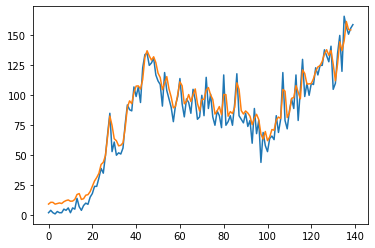

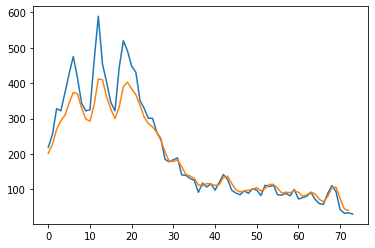

In [21]:
plt.plot(trainY)
plt.plot(trainPredict[1:])
plt.show()
plt.plot(testY)
plt.plot(testPredict[1:])
plt.show()